In [117]:
from matplotlib import pyplot as plt
from google.oauth2 import service_account
from google.cloud import bigquery

In [118]:
credentials = service_account.Credentials.from_service_account_file("./bigquery_key.json")
client = bigquery.Client(
    credentials=credentials,
    project=credentials.project_id
)

In [119]:
plt.rc("font", family="Malgun Gothic")

In [129]:
traffic_accident_city_sql = """
    SELECT
        *
    FROM
        `calcium-channel-428804-c3.traffic_accident.traffic_accident_city_5`
"""

In [130]:
traffic_accident_city_df = client.query(traffic_accident_city_sql).to_dataframe()
traffic_accident_city_df = traffic_accident_city_df.set_index("age_group")

C:\Users\minni\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [131]:
traffic_accident_city_df

,서울,부산,강원,충북,충남,전북,전남,경북,경남,제주,대구,인천,광주,대전,울산,세종,경기
age_group,,,,,,,,,,,,,,,,,
10,1120.4,363.4,169.6,273.0,269.0,169.8,270.2,355.8,335.0,117.6,469.2,243.4,301.0,199.4,128.8,41.8,1850.4
20,4655.4,1603.6,852.6,1202.4,1255.4,781.8,1080.8,1424.6,1323.2,707.0,1773.0,1190.2,1202.6,1160.8,531.0,127.8,7400.0
30,5673.2,1696.8,833.0,1154.2,1314.4,735.8,1137.8,1564.4,1579.8,662.4,1716.2,1273.4,1084.8,1079.4,602.6,160.6,8323.0
40,6030.4,2018.4,1151.4,1438.2,1570.2,1102.4,1569.6,2089.8,2136.0,806.6,2086.6,1427.0,1337.0,1304.2,731.4,210.6,10115.8
50,7787.8,2625.2,1648.0,1924.4,1971.4,1512.2,2162.8,2931.8,2857.8,892.2,2827.2,1939.6,1667.8,1689.0,929.6,186.0,12862.4
60,3247.0,1140.8,717.0,778.0,754.4,621.2,887.4,1178.0,1123.2,313.4,1110.6,770.8,685.4,697.0,345.4,70.6,4721.0
65,5890.0,2027.0,1313.0,1438.8,1473.2,1361.2,2028.6,2600.4,2020.4,631.4,2040.6,1042.4,1084.4,1132.8,550.2,110.6,7338.6


In [132]:
total = traffic_accident_city_df.sum(axis=0)
traffic_accident_city_df = traffic_accident_city_df.div(total, axis=1) * 100

In [133]:
traffic_accident_city_df

,서울,부산,강원,충북,충남,전북,전남,경북,경남,제주,대구,인천,광주,대전,울산,세종,경기
age_group,,,,,,,,,,,,,,,,,
10,3.256579,3.166829,2.537175,3.325618,3.125000,2.701929,2.957142,2.929649,2.944951,2.847044,3.902390,3.086169,4.088008,2.745573,3.372611,4.603524,3.517122
20,13.531487,13.974484,12.754690,14.647338,14.584108,12.440328,11.828569,11.730123,11.632118,17.116157,14.746245,15.091038,16.333016,15.983257,13.904163,14.074890,14.065446
30,16.489847,14.786670,12.461479,14.060178,15.269517,11.708357,12.452392,12.881233,13.887863,16.036411,14.273833,16.145965,14.733125,14.862446,15.779000,17.687225,15.819825
40,17.528093,17.589236,17.224666,17.519795,18.241171,17.541850,17.178129,17.207364,18.777362,19.527429,17.354492,18.093523,18.158359,17.957756,19.151610,23.193833,19.227465
50,22.636190,22.877161,24.653682,23.442563,22.901952,24.062759,23.670271,24.140373,25.122633,21.599768,23.514147,24.592991,22.651093,23.256134,24.341451,20.484581,24.448026
60,9.437801,9.941439,10.726147,9.477403,8.763941,9.884794,9.711947,9.699625,9.873938,7.587275,9.236988,9.773292,9.308706,9.597114,9.044252,7.775330,8.973374
65,17.120003,17.664180,19.642163,17.527104,17.114312,21.659983,22.201550,21.411633,17.761134,15.285915,16.971905,13.217021,14.727693,15.597720,14.406913,12.180617,13.948741


In [134]:
traffic_accident_city_df = traffic_accident_city_df.loc[65]

In [135]:
traffic_accident_city_df

서울    17.120003
부산    17.664180
강원    19.642163
충북    17.527104
충남    17.114312
전북    21.659983
전남    22.201550
경북    21.411633
경남    17.761134
제주    15.285915
대구    16.971905
인천    13.217021
광주    14.727693
대전    15.597720
울산    14.406913
세종    12.180617
경기    13.948741
Name: 65, dtype: float64

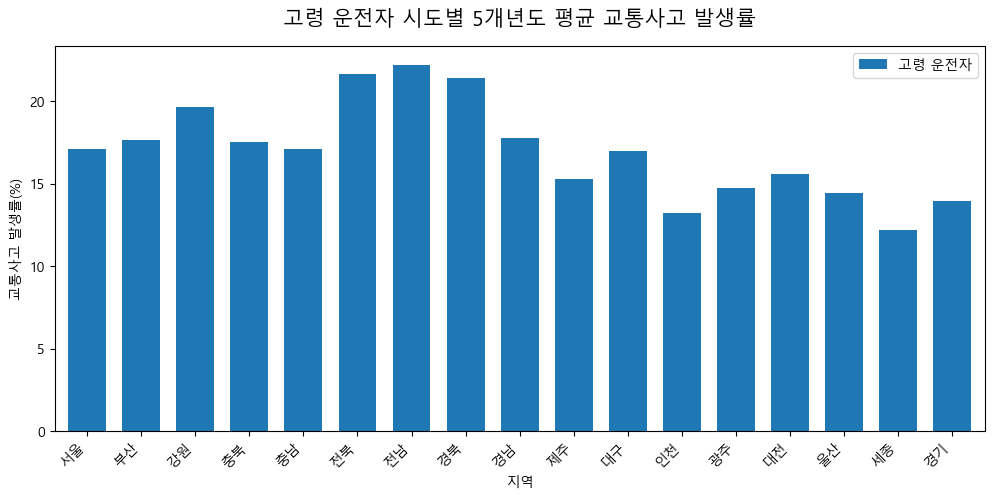

In [136]:
traffic_accident_city_df = traffic_accident_city_df.transpose()
traffic_accident_city_df.plot(kind="bar", width=0.7, figsize=(12, 5))
plt.title("고령 운전자 시도별 5개년도 평균 교통사고 발생률", size=15, pad=15)
plt.xlabel("지역")
plt.ylabel("교통사고 발생률(%)")
plt.xticks(rotation=45, ha="right")
plt.legend(["고령 운전자"], loc="best")
plt.savefig("./result/traffic_accident_city_v6.png", bbox_inches="tight")

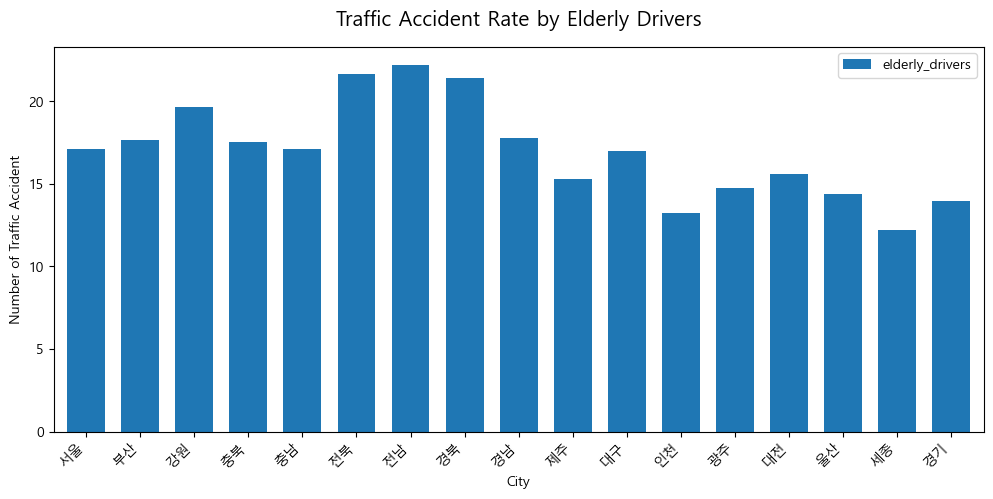

In [137]:
traffic_accident_city_df.plot(kind="bar", width=0.7, figsize=(12, 5))
plt.title("Traffic Accident Rate by Elderly Drivers", size=15, pad=15)
plt.xlabel("City")
plt.ylabel("Number of Traffic Accident")
plt.xticks(rotation=45, ha="right")
plt.legend(["elderly_drivers"], loc="best")
plt.savefig("./result/traffic_accident_city_v5.png", bbox_inches="tight")